In [1]:
# import a module, we learnt this two sessions ago
import tensorflow as tf

Today, we will build a Neural Network to help us predict what number is written on a piece of paper.

While we could ask 60,000 people for this data, MNIST has already done this.

In [2]:
# import/pull mnist numbers dataset from tensorflow
mnist = tf.keras.datasets.mnist

We start with training. We end with testing. We will split the 60,000 data points into training and testing sets of data.

In [3]:
# allocate training/testing split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Now, let's examine how we will look at and study each number. Images of numbers will be mapped by pixel to a graph. The images are 256 x 256 pixels, but for ease of processing, we use 255 x 255.

2


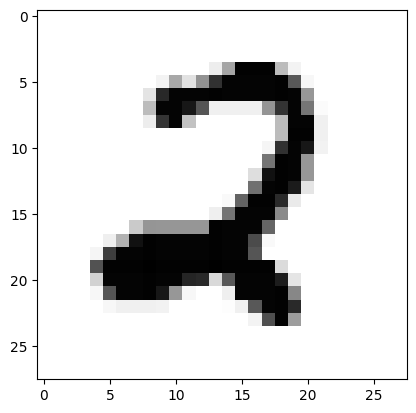

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose an image from the training set
image_num = 365

# graph the image specified
plt.imshow(x_train[image_num], cmap="Greys")
print(y_train[image_num])

The three steps in tensorflow to develop a neural network are as follows:
1.   Set up the layers architecture
2.   Specify the objective function to optimize
3.   Run the 'model.fit' function to train our model with our training data

We will conduct these steps below...



In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [8]:
# we want to reward computer for being right and punish it for being wrong
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
# making correlations and deductions about relation between picture and its label
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2938 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1454 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1092 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0898 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0765 - accuracy: 0.9758


Let's analyze and evaluate our test results.

In [10]:
# this will show us our test results
model.evaluate(x_test, y_test, verbose=0)

[0.06915285438299179, 0.977400004863739]

To explore these values further...
*   List item 1: loss value (penalty for a bad prediction, which decreases as our accuracy increases as we want to deviate less from the current result at high accuracies)
*   List item 2: accuracy of our prediction as compared to its label



Now, we define a function to read in an image index and show the image, show the prediction results, and check whether the prediction is correct.

In [11]:
def checkPrediction(image_index):
  plt.imshow(x_test[image_index].reshape(28, 28), cmap="Greys")
  pred = model.predict(x_test[image_index].reshape(1, 28, 28))
  pred_label = pred.argmax()
  orig_label = y_test[image_index]
  print("Original label is: ", orig_label)
  print("ML model prediction is: ", pred_label)
  if pred_label == orig_label:
    print("Correct prediction!")
  else:
    print("Wrong prediciton.")

1/1 [==============================] - 0s 25ms/step
Original label is:  5
ML model prediction is:  8
Wrong prediciton.


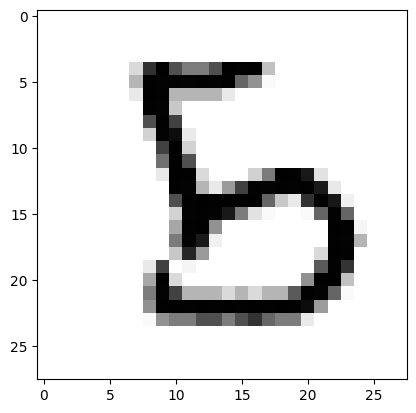

In [17]:
checkPrediction(720)